In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np
import os
import warnings

In [60]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")



In [61]:
# Set the OMP_NUM_THREADS environment variable to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "1"

In [62]:
df=pd.read_csv('Mall_Customers.csv')

In [63]:
df.isnull().sum().sum()

0

In [64]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


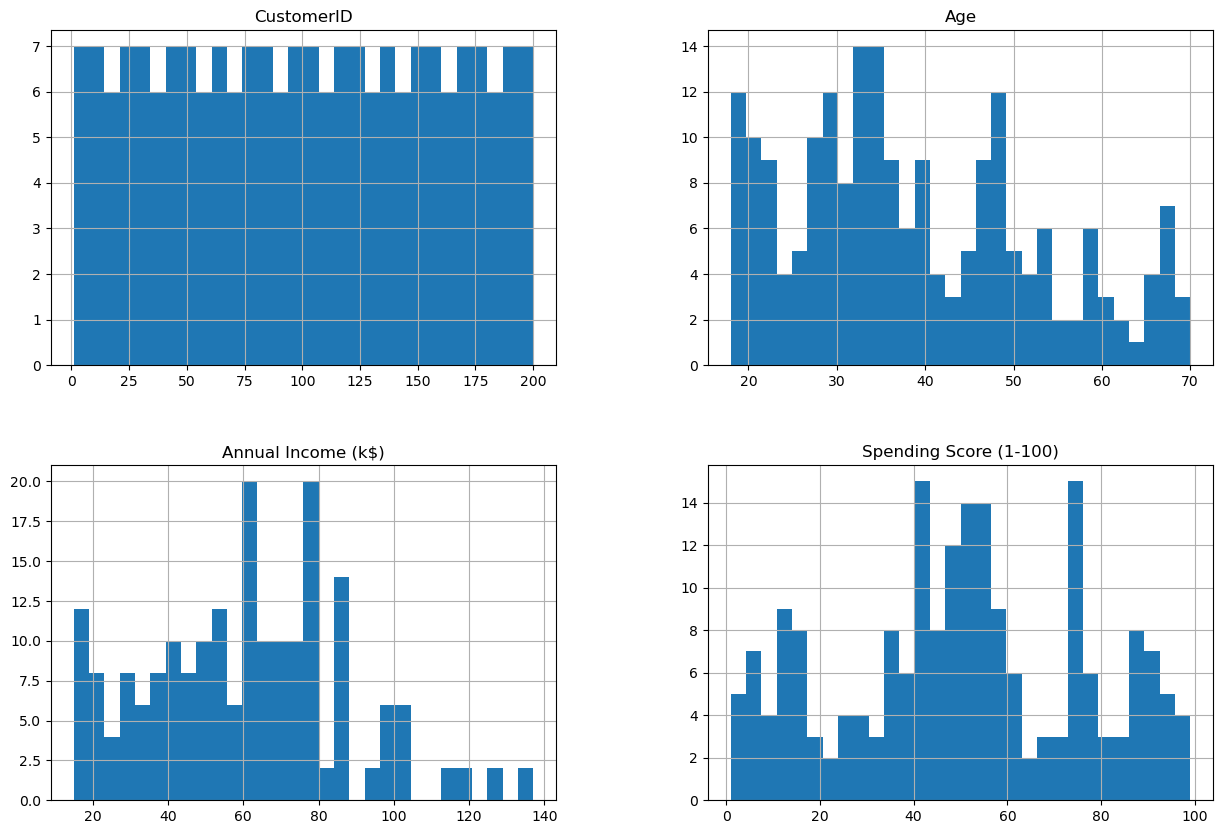

In [67]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [68]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Preprocess the data (handle missing values, encode categorical variables, scale features)
df = df.dropna()  # Drop rows with missing values

# Define column transformer for encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations
scaled_features = preprocessor.fit_transform(df)

In [69]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


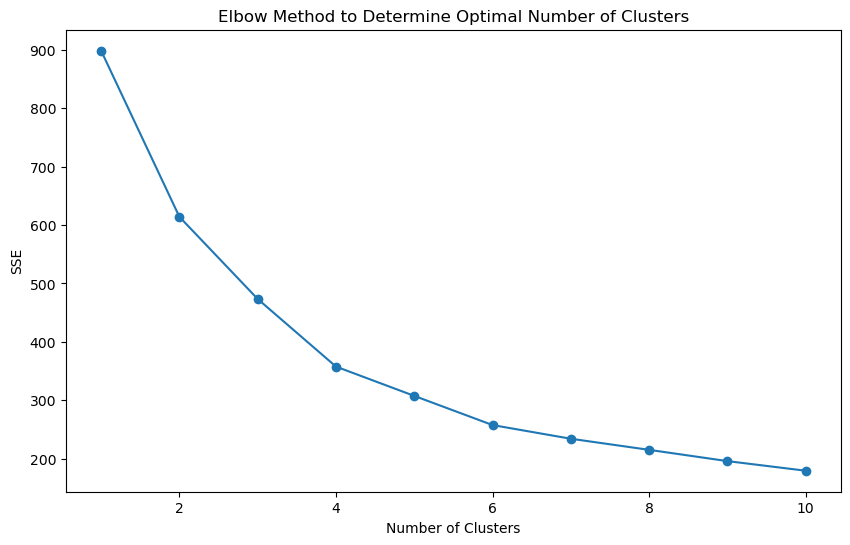

In [70]:
# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [71]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [72]:
numeric_cluster_profiles = df.groupby('Cluster')[numerical_cols].mean()
print(numeric_cluster_profiles)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         73.112903  54.983871           49.419355               40.338710
1        158.548780  35.024390           85.207317               52.207317
2         45.821429  26.589286           36.803571               58.178571


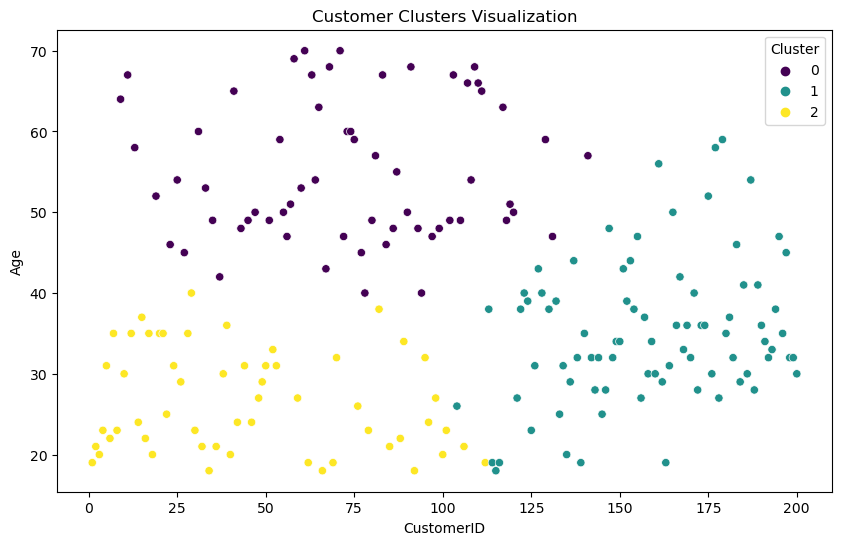

In [73]:
feature1 = numerical_cols[0]  # Replace with the actual feature name
feature2 = numerical_cols[1]  # Replace with the actual feature name

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature1, y=feature2, hue='Cluster', palette='viridis')
plt.title('Customer Clusters Visualization')
plt.show()